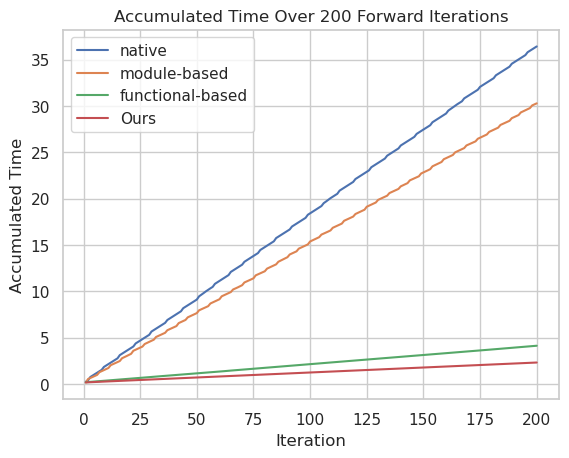

,Method,First Step Time,Avg Time per Step (± Std)
0,native,0.2466,0.1818 ± 0.0601
1,module-based,0.1768,0.1513 ± 0.0737
2,functional-based,0.2013,0.0198 ± 0.0007
3,Ours,0.1805,0.0108 ± 0.0006


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to manage paths and method names
method_files = {
    'native': '../vectorizeFalse_assignFalse_deepcopyFalse.npy',
    'module-based': '../vectorizeTrue_assignTrue_deepcopyTrue.npy',
    'functional-based': '../vectorizeTrue_assignTrue_deepcopyFalse.npy',
    'Ours': '../vectorizeTrue_assignFalse_deepcopyFalse.npy',
}

# Load the data from the .npy files
methods = {name: np.load(path) for name, path in method_files.items()}

# Create a plot of the four time arrays
steps = np.arange(1, 201)  # 200 steps as x-axis

plt.figure()
for name, method in methods.items():
    plt.plot(steps, method, label=name)

plt.xlabel('Iteration')
plt.ylabel('Accumulated Time')
plt.title('Accumulated Time Over 200 Forward Iterations')
plt.legend()
plt.show()

# Function to calculate first step time, average time per step (after first step), and standard deviation
def analyze_times(method):
    first_step_time = method[0]
    rest_times = np.diff(method)  # Differences between consecutive steps to get time per step
    avg_time = np.mean(rest_times)
    std_time = np.std(rest_times)
    return first_step_time, avg_time, std_time

# Generate table for each method with avg ± std format
data = []

for name, method in methods.items():
    first_time, avg_time, std_time = analyze_times(method)
    avg_std_format = f"{avg_time:.4f} ± {std_time:.4f}"  # Format as avg ± std
    data.append([name, f"{first_time:.4f}", avg_std_format])

# Create a DataFrame for easy viewing
df = pd.DataFrame(data, columns=['Method', 'First Step Time', 'Avg Time per Step (± Std)'])

# Display the DataFrame
df

In [3]:
import os
os.getcwd()

'/data/shurui.gui/Projects/CEL/notebooks'